
# Text Feature Extraction, LDA and Sentiment Analysis

In [1]:
# -*- coding: utf-8 -*-


### Some of the Code protocol modified from Natural Language Processing with 
# Python (Bird, Klein, Loper)

%reset -f

import re 
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import csv 
import nltk
import nltk.classify
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans 
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import collections
from nltk.metrics import *
from tabulate import tabulate
import ast
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
import pyLDAvis.gensim
from sklearn.pipeline import Pipeline
import time 
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifiers
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

/Users/ryannazareth/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-09-06 01:49:40.527459. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


### Importing the libraries 

### Reading in the data 

In [2]:
tweet_frame = pd.read_csv('snakebite.csv', sep = ',', encoding = 'latin-1')

data = tweet_frame.loc[:,['cleaned', 'Sentiment']]

# % positive tweets
len(data[data['Sentiment'] == 1])/len(data[0:1555])*100

# %negative tweets
len(data[data['Sentiment'] == 0])/len(data[0:1555])*100

## storing the positive, neutal and negative label strings in a separate array for tsne visualisation
labels = []
for index, row in data.iterrows():
    if row['Sentiment'] ==0:
        labels.append("Negative")
    elif row['Sentiment'] ==1:
        labels.append("Positive")
    else:
        labels.append("Neutral")


FileNotFoundError: File b'snakebite.csv' does not exist

/Users/ryannazareth/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-09-06 01:50:00.280393. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


### Generating features using Bag of Words and Tf-IDF approach.  The feature matrix is then input into k-means clustering algorithm to cluster words into topic groups 

### Bag of Words(1gram)

[[  0.00000000e+00   7.80618273e-01   8.01970491e-01 ...,   6.63663603e-01
    7.02955737e-01   7.02955737e-01]
 [  7.80618273e-01  -2.22044605e-16   7.53817018e-01 ...,   8.32751598e-01
    8.76908509e-01   8.76908509e-01]
 [  8.01970491e-01   7.53817018e-01  -2.22044605e-16 ...,   8.86772297e-01
    8.33333333e-01   8.33333333e-01]
 ..., 
 [  6.63663603e-01   8.32751598e-01   8.86772297e-01 ...,   2.22044605e-16
    8.86772297e-01   8.86772297e-01]
 [  7.02955737e-01   8.76908509e-01   8.33333333e-01 ...,   8.86772297e-01
   -2.22044605e-16  -2.22044605e-16]
 [  7.02955737e-01   8.76908509e-01   8.33333333e-01 ...,   8.86772297e-01
   -2.22044605e-16  -2.22044605e-16]]
2    640
1    376
8    260
4    259
0     67
6     50
7     35
9     30
5     28
3      5
Name: ClusterID, dtype: int64

Cluster 0 : Words :
 venomous
 funding
 professor
 get
 could
 project
 working
 treating
 aimed
 bite

Cluster 1 : Words :
 snake
 venom
 venomous
 bite
 antivenom
 new
 australian
 human
 monoxide


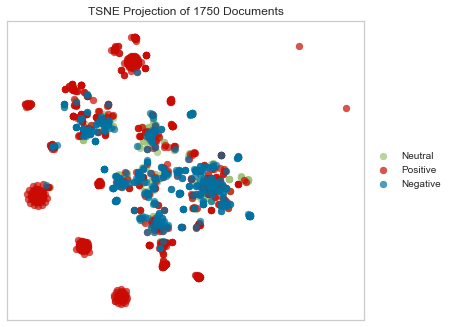

In [3]:
######### Bag of words - unigrams 

vectorizer_uni = CountVectorizer(ngram_range = (1,1))
# tokenize and build vocab
matrix_uni = vectorizer_uni.fit_transform(data['cleaned'].values.astype('U'))
feature_names = vectorizer_uni.get_feature_names() 
dist = 1-cosine_similarity(matrix_uni)
print(dist)


### clustering 
num_clusters = 10 
km = KMeans(n_clusters=num_clusters)  
km.fit(matrix_uni)  
clusters = km.labels_.tolist()  
data['ClusterID'] = clusters  
print(data['ClusterID'].value_counts())

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print('')
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])
        
        
tsne = TSNEVisualizer()
tsne.fit(matrix_uni, labels)
tsne.poof()      


### Bag of Words(1-2 grams)

[[  1.11022302e-16   8.82420730e-01   8.91693928e-01 ...,   7.84473638e-01
    7.83387856e-01   7.83387856e-01]
 [  8.82420730e-01  -4.44089210e-16   8.68409661e-01 ...,   9.12712844e-01
    9.34204831e-01   9.34204831e-01]
 [  8.91693928e-01   8.68409661e-01  -2.22044605e-16 ...,   9.39697731e-01
    9.09090909e-01   9.09090909e-01]
 ..., 
 [  7.84473638e-01   9.12712844e-01   9.39697731e-01 ...,  -6.66133815e-16
    9.39697731e-01   9.39697731e-01]
 [  7.83387856e-01   9.34204831e-01   9.09090909e-01 ...,   9.39697731e-01
   -2.22044605e-16  -2.22044605e-16]
 [  7.83387856e-01   9.34204831e-01   9.09090909e-01 ...,   9.39697731e-01
   -2.22044605e-16  -2.22044605e-16]]
1    1035
5     258
0     170
3      77
8      73
2      67
4      33
9      28
6       5
7       4
Name: ClusterID, dtype: int64

Cluster 0 : Words :
 snake
 venom
 anti
 anti snake
 snake venom
 nigeria
 bite
 snakebite
 snake bite
 scarcity

Cluster 1 : Words :
 snake
 snakebite
 venom
 snake venom
 venomous
 ntd
 v

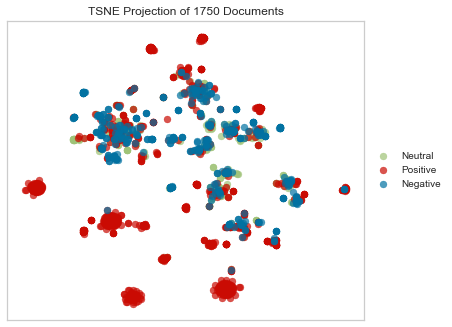

In [4]:
######### Bag of words - bigrams 

vectorizer_bi = CountVectorizer(ngram_range = (1,2))
# tokenize and build vocab
matrix_bi = vectorizer_bi.fit_transform(data['cleaned'].values.astype('U'))
feature_names = vectorizer_bi.get_feature_names() 
dist = 1-cosine_similarity(matrix_bi)
print(dist)

#clustering
num_clusters = 10 
km = KMeans(n_clusters=num_clusters)  
km.fit(matrix_bi)  
clusters = km.labels_.tolist()  
data['ClusterID'] = clusters  
print(data['ClusterID'].value_counts())

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print('')
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])
        
tsne = TSNEVisualizer()
tsne.fit(matrix_bi, labels)
tsne.poof()            

### Bag of Words (1-2-3 grams)

[[  5.55111512e-16   9.17427718e-01   9.22150106e-01 ...,   8.49244328e-01
    8.44300211e-01   8.44300211e-01]
 [  9.17427718e-01   2.22044605e-16   9.05719096e-01 ...,   9.39141938e-01
    9.52859548e-01   9.52859548e-01]
 [  9.22150106e-01   9.05719096e-01   2.22044605e-16 ...,   9.56966852e-01
    9.33333333e-01   9.33333333e-01]
 ..., 
 [  8.49244328e-01   9.39141938e-01   9.56966852e-01 ...,  -2.22044605e-16
    9.56966852e-01   9.56966852e-01]
 [  8.44300211e-01   9.52859548e-01   9.33333333e-01 ...,   9.56966852e-01
    2.22044605e-16   2.22044605e-16]
 [  8.44300211e-01   9.52859548e-01   9.33333333e-01 ...,   9.56966852e-01
    2.22044605e-16   2.22044605e-16]]
1    945
8    257
4    196
6    125
5     73
2     67
3     38
7     28
9     19
0      2
Name: ClusterID, dtype: int64

Cluster 0 : Words :
 going call proposal
 proposal developing novel
 call
 call proposal
 call proposal developing
 pro
 hear going call
 hear going
 technology pro
 hear

Cluster 1 : Words :
 snakeb

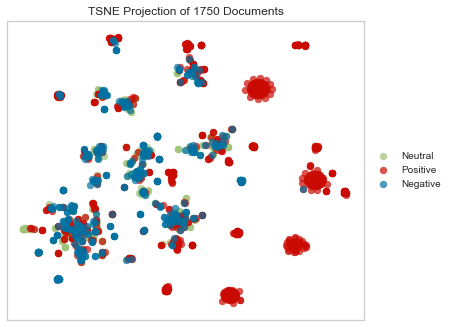

In [5]:
######### Bag of words - bigrams 

vectorizer_tri = CountVectorizer(ngram_range = (1,3))
# tokenize and build vocab
matrix_tri = vectorizer_tri.fit_transform(data['cleaned'].values.astype('U'))
feature_names = vectorizer_tri.get_feature_names() 
dist = 1-cosine_similarity(matrix_tri)
print(dist)

#clustering
num_clusters = 10 
km = KMeans(n_clusters=num_clusters)  
km.fit(matrix_tri)  
clusters = km.labels_.tolist()  
data['ClusterID'] = clusters  
print(data['ClusterID'].value_counts())

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print('')
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])

tsne = TSNEVisualizer()
tsne.fit(matrix_tri, labels)
tsne.poof()    

###  1grams with Term Frequency Inverse Document Frequency  

[[ 0.          0.97577895  0.98538417 ...,  0.91316171  0.92726526
   0.92726526]
 [ 0.97577895  0.          0.91152875 ...,  0.98425468  0.98537047
   0.98537047]
 [ 0.98538417  0.91152875  0.         ...,  0.99333218  0.98464848
   0.98464848]
 ..., 
 [ 0.91316171  0.98425468  0.99333218 ...,  0.          0.99027285
   0.99027285]
 [ 0.92726526  0.98537047  0.98464848 ...,  0.99027285  0.          0.        ]
 [ 0.92726526  0.98537047  0.98464848 ...,  0.99027285  0.          0.        ]]
0    1035
1     145
6     127
5     106
2      73
4      67
7      66
8      55
3      45
9      31
Name: ClusterID, dtype: int64

Cluster 0 : Words :
 snake
 snakebite
 venom
 bite
 anti
 venomous
 via
 new
 antivenom
 blood

Cluster 1 : Words :
 approves
 gombe
 anti
 venom
 snake
 govt
 icymi
 fyi
 nigerianewsdesk
 new

Cluster 2 : Words :
 courageous
 owner
 protect
 take
 dog
 snakebite
 pittsburgh
 click
 full
 story

Cluster 3 : Words :
 bull
 pit
 venomous
 child
 save
 kid
 hero
 bit
 snake

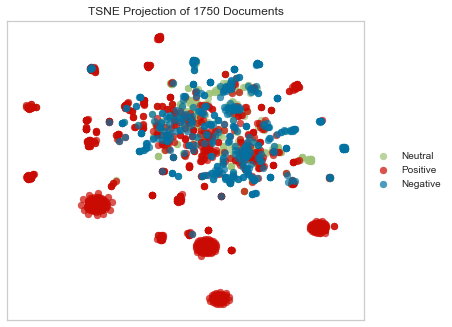

In [6]:
######### Tf-IDF vectoriser 


tfidf_vectorizer_uni = TfidfVectorizer(use_idf=True, ngram_range=(1,1))  
tfidf_matrix = tfidf_vectorizer_uni.fit_transform(data['cleaned'].values.astype('U'))  
feature_names = tfidf_vectorizer_uni.get_feature_names() # num phrases  
from sklearn.metrics.pairwise import cosine_similarity  
dist = 1 - cosine_similarity(tfidf_matrix)  
print(dist) 

num_clusters = 10 
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist()  
data['ClusterID'] = clusters  
print(data['ClusterID'].value_counts())


#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print('')
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])



tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix, labels)
tsne.poof()        

###  (1,2) grams with Term Frequency Inverse Document Frequency  

[[  0.00000000e+00   9.89849898e-01   9.94173078e-01 ...,   9.52133956e-01
    9.50338415e-01   9.50338415e-01]
 [  9.89849898e-01  -2.22044605e-16   9.61807361e-01 ...,   9.92896284e-01
    9.93928284e-01   9.93928284e-01]
 [  9.94173078e-01   9.61807361e-01  -2.22044605e-16 ...,   9.97138088e-01
    9.93938630e-01   9.93938630e-01]
 ..., 
 [  9.52133956e-01   9.92896284e-01   9.97138088e-01 ...,  -2.22044605e-16
    9.95986148e-01   9.95986148e-01]
 [  9.50338415e-01   9.93928284e-01   9.93938630e-01 ...,   9.95986148e-01
   -2.22044605e-16  -2.22044605e-16]
 [  9.50338415e-01   9.93928284e-01   9.93938630e-01 ...,   9.95986148e-01
   -2.22044605e-16  -2.22044605e-16]]
0    1199
3     141
2     104
4      73
1      67
9      54
5      52
7      28
8      18
6      14
Name: ClusterID, dtype: int64

Cluster 0 : Words :
 snake
 snakebite
 venom
 bite
 anti
 snake bite
 snake venom
 anti venom
 venomous
 anti snake

Cluster 1 : Words :
 bite could
 get funding
 project aimed
 treating ve

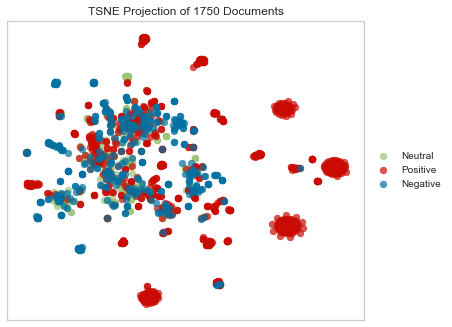

In [7]:
######### Tf-IDF vectoriser with (1,2) n grams

tfidf_vectorizer_bi = TfidfVectorizer(use_idf=True, ngram_range=(1,2))  
tfidf_matrix = tfidf_vectorizer_bi.fit_transform(data['cleaned'].values.astype('U'))  
feature_names = tfidf_vectorizer_bi.get_feature_names() # num phrases  
from sklearn.metrics.pairwise import cosine_similarity  
dist = 1 - cosine_similarity(tfidf_matrix)  
print(dist) 

num_clusters = 10 
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist()  
data['ClusterID'] = clusters  
print(data['ClusterID'].value_counts())


#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print('')
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])
        
tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix, labels)
tsne.poof()  

###  (1,2, 3) grams with Term Frequency Inverse Document Frequency  

[[ -2.22044605e-16   9.93650198e-01   9.96269329e-01 ...,   9.70043318e-01
    9.69585889e-01   9.69585889e-01]
 [  9.93650198e-01  -2.22044605e-16   9.74638367e-01 ...,   9.95388931e-01
    9.96143300e-01   9.96143300e-01]
 [  9.96269329e-01   9.74638367e-01  -2.22044605e-16 ...,   9.98098789e-01
    9.96059666e-01   9.96059666e-01]
 ..., 
 [  9.70043318e-01   9.95388931e-01   9.98098789e-01 ...,   0.00000000e+00
    9.97449401e-01   9.97449401e-01]
 [  9.69585889e-01   9.96143300e-01   9.96059666e-01 ...,   9.97449401e-01
    0.00000000e+00   0.00000000e+00]
 [  9.69585889e-01   9.96143300e-01   9.96059666e-01 ...,   9.97449401e-01
    0.00000000e+00   0.00000000e+00]]
8    1188
1     131
3     103
5      85
6      73
4      67
9      53
2      25
7      13
0      12
Name: ClusterID, dtype: int64

Cluster 0 : Words :
 antivenoms ineffective
 antivenoms ineffective common
 fatal snakebite
 common fatal
 common fatal snakebite
 ineffective
 ineffective common
 ineffective common fatal


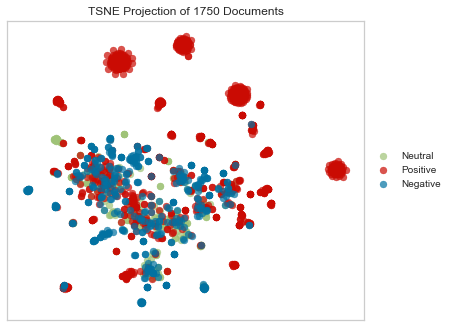

In [8]:
######### Tf-IDF vectoriser with (1,2,3) grams

tfidf_vectorizer_tri = TfidfVectorizer(use_idf=True, ngram_range=(1,3))  
tfidf_matrix = tfidf_vectorizer_tri.fit_transform(data['cleaned'].values.astype('U'))  
feature_names = tfidf_vectorizer_tri.get_feature_names() # num phrases  
from sklearn.metrics.pairwise import cosine_similarity  
dist = 1 - cosine_similarity(tfidf_matrix)  
print(dist) 

num_clusters = 10 
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist()  
data['ClusterID'] = clusters  
print(data['ClusterID'].value_counts())


#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print('')
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])

tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix, labels)
tsne.poof()  

## Sentiment Analysis 

#### Splitting data into train and test into 75/25 split  and using SMOTE to oversample minority class

In [9]:
data.Sentiment.replace(0.5, 2, inplace = True)
    

X_train, X_test, y_train, y_test = train_test_split(data['cleaned'][data['Sentiment'].notnull()],data['Sentiment'][data['Sentiment'].notnull()],test_size=0.25, random_state=42)




## SMOTE, Stratified Cross validation (10 folds), Grid search  and model performance evaluation 

The following section trains and tests a number of models using data set transformed using unigrams, bigrams and tf-idf vectoriser approach separately.Using a grid search to tune hyperparameters for SVC (rbf kernel), SVC (linear kernel), Naive Bayes, Decision Tree. Using cross validation with stratification because of the unbalanced class distrubtion. The  classifier with the best parameter combination during grid search is used to predict on the test set. The F1 scores for each model on the test set is then reported. The mean F1 score for the each model on the training set is also reported for comparison. The confusion matrix for the best performing model on the test set is plotted at the end. 

### Using 1 gram vectoriser generated previously to transform the train and test data into features (unigrams). Treating class imbalance using SMOTE 

In [23]:
train_vectors = vectorizer_uni.fit_transform(X_train)
test_vectors = vectorizer_uni.transform(X_test)

## using SMOTE to oversample minority class 
X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(train_vectors, y_train)
print(sorted(Counter(y_resampled).items()))


[(0.0, 710), (1.0, 710), (2.0, 710)]


### Training and testing models using grid search 

SVM RBF: The highest accuracy on the training set after grid search was 0.91
The best parameters are:
{'C': 100, 'gamma': 0.01}


SVM linear One vs Rest: The highest accuracy on the training set after grid search was 0.92
The best parameters are:
{'C': 1}


Naive Bayes: The highest accuracy on the training set after grid search was 0.88
The best parameters are:
{'alpha': 0.5}


Decision Tree: The highest accuracy on the training set after grid search was 0.62
The best parameters are:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}



Results for SVC(kernel=rbf)
Training time: 98.329187s; Prediction time: 0.037065s
             precision    recall  f1-score   support

        0.0       0.84      0.71      0.77       114
        1.0       0.86      0.84      0.85       250
        2.0       0.49      0.65      0.56        74

avg / total       0.79      0.78      0.78       438

Results for LinearSVC()
Training time: 7.334432s; Prediction time: 0.00

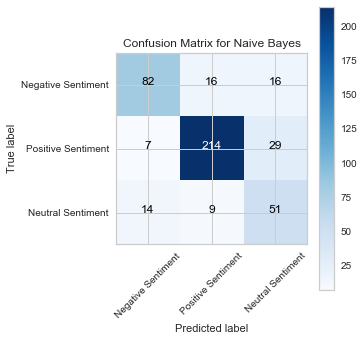

In [24]:

skf = StratifiedKFold(n_splits = 10, random_state=42)


# Perform classification with SVM, kernel=rbf
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [0.01, 0.001, 0.0001] }
clf_rbf = SVC(kernel = 'rbf',decision_function_shape='ovo')
grid_search = GridSearchCV(clf_rbf, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(X_resampled, y_resampled)
t1 = time.time()
clf_rbf = grid_search.best_estimator_
print('SVM RBF: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_rbf = clf_rbf.predict(test_vectors)
cnf_matrix_rbf = confusion_matrix(y_test, prediction_rbf)
print('')
print('')
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1



# Perform classification with SVM, kernel=linear - one vs rest
param_grid = {"C": [0.1, 1, 10, 100, 1000] }
clf_liblinear = LinearSVC()
grid_search = GridSearchCV(clf_liblinear, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(X_resampled, y_resampled)
t1 = time.time()
clf_liblinear = grid_search.best_estimator_
print('SVM linear One vs Rest: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_liblinear = clf_liblinear.predict(test_vectors)
cnf_matrix_liblinear = confusion_matrix(y_test, prediction_liblinear)
print('')
print('')
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1



# Perform classification with Naive Bayes (Multinomial)
param_grid = {"alpha": [0.5, 1, 1.5, 2] }
clf_MN_NB = MultinomialNB(fit_prior = True)
grid_search = GridSearchCV(clf_MN_NB, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(X_resampled, y_resampled)
t1 = time.time()
clf_MN_NB = grid_search.best_estimator_
print('Naive Bayes: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_MN_NB = clf_MN_NB.predict(test_vectors)
cnf_matrix_NB = confusion_matrix(y_test, prediction_MN_NB)
print('')
print('')
t2 = time.time()
time_MN_NB_train = t1-t0
time_MN_NB_predict = t2-t1



# Perform classification with Decision Tree 
param_grid = {"max_depth": [3, 6, 10], "min_samples_split": [2, 5, 10], "criterion": ['gini', 'entropy'], "min_samples_leaf": [1, 5, 10] }
clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(clf_DT, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(X_resampled, y_resampled)
t1 = time.time()
clf_DT = grid_search.best_estimator_
print('Decision Tree: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_DT = clf_DT.predict(test_vectors)
cnf_matrix_DT = confusion_matrix(y_test, prediction_DT)
print('')
print('')
print('')
t2 = time.time()
time_DT_train = t1-t0
time_DT_predict = t2-t1



# Print results in a nice table

print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))


print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))
print("Results for Multinomial Naive Bayes")
print("Training time: %fs; Prediction time: %fs" % (time_MN_NB_train, time_MN_NB_predict))
print(classification_report(y_test, prediction_MN_NB))
print("Results for Decision Tree")
print("Training time: %fs; Prediction time: %fs" % (time_DT_train, time_DT_predict))
print(classification_report(y_test, prediction_DT))
print('')
print('')

## plotting confusion matrix for the best performing model

def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_NB, classes=['Negative Sentiment', 'Positive Sentiment', 'Neutral Sentiment'], title = 'Confusion Matrix for Naive Bayes')

plt.show()    

### Using 1-2 ngramvectorsier generated previously to transform the train and test data into features 

In [25]:
train_vectors = vectorizer_bi.fit_transform(X_train)
test_vectors = vectorizer_bi.transform(X_test)


## using SMOTE to oversample minority class 
X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(train_vectors, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 710), (1.0, 710), (2.0, 710)]


### Training and testing models using grid search 

SVM RBF: The highest accuracy on the training set after grid search was 0.79
The best parameters are:
{'C': 100, 'gamma': 0.001}


SVM linear One vs Rest: The highest accuracy on the training set after grid search was 0.79
The best parameters are:
{'C': 0.1}


Naive Bayes: The highest accuracy on the training set after grid search was 0.77
The best parameters are:
{'alpha': 0.5}


Decision Tree: The highest accuracy on the training set after grid search was 0.66
The best parameters are:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}



Results for SVC(kernel=rbf)
Training time: 44.386580s; Prediction time: 0.045128s
             precision    recall  f1-score   support

        0.0       0.82      0.71      0.76       114
        1.0       0.87      0.87      0.87       250
        2.0       0.50      0.61      0.55        74

avg / total       0.79      0.78      0.79       438

Results for LinearSVC()
Training time: 8.807955s; Prediction time: 0.

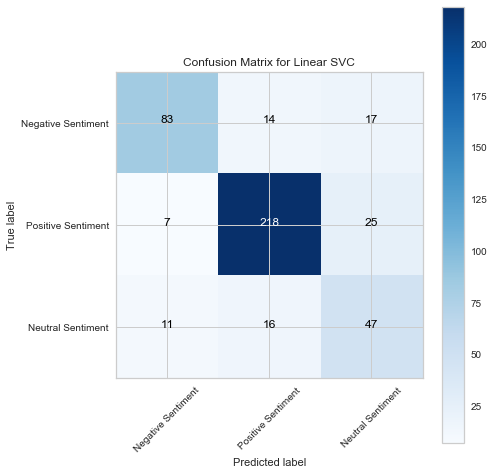

In [26]:
skf = StratifiedKFold(n_splits = 10, random_state=42)


# Perform classification with SVM, kernel=rbf
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [0.01, 0.001, 0.0001] }
clf_rbf = SVC(kernel = 'rbf',decision_function_shape='ovo')
grid_search = GridSearchCV(clf_rbf, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_rbf = grid_search.best_estimator_
print('SVM RBF: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_rbf = clf_rbf.predict(test_vectors)
cnf_matrix_rbf = confusion_matrix(y_test, prediction_rbf)
print('')
print('')
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1



# Perform classification with SVM, kernel=linear - one vs rest
param_grid = {"C": [0.1, 1, 10, 100, 1000] }
clf_liblinear = LinearSVC()
grid_search = GridSearchCV(clf_liblinear, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_liblinear = grid_search.best_estimator_
print('SVM linear One vs Rest: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_liblinear = clf_liblinear.predict(test_vectors)
cnf_matrix_liblinear = confusion_matrix(y_test, prediction_liblinear)
print('')
print('')
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1



# Perform classification with Naive Bayes (Multinomial)
param_grid = {"alpha": [0.5, 1, 1.5, 2] }
clf_MN_NB = MultinomialNB(fit_prior = True)
grid_search = GridSearchCV(clf_MN_NB, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_MN_NB = grid_search.best_estimator_
print('Naive Bayes: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_MN_NB = clf_MN_NB.predict(test_vectors)
cnf_matrix_NB = confusion_matrix(y_test, prediction_MN_NB)
print('')
print('')
t2 = time.time()
time_MN_NB_train = t1-t0
time_MN_NB_predict = t2-t1



# Perform classification with Decision Tree 
param_grid = {"max_depth": [3, 6, 10], "min_samples_split": [2, 5, 10], "criterion": ['gini', 'entropy'], "min_samples_leaf": [1, 5, 10] }
clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(clf_DT, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_DT = grid_search.best_estimator_
print('Decision Tree: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_DT = clf_DT.predict(test_vectors)
cnf_matrix_DT = confusion_matrix(y_test, prediction_DT)
print('')
print('')
print('')
t2 = time.time()
time_DT_train = t1-t0
time_DT_predict = t2-t1



# Print results in a nice table

print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))


print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))
print("Results for Multinomial Naive Bayes")
print("Training time: %fs; Prediction time: %fs" % (time_MN_NB_train, time_MN_NB_predict))
print(classification_report(y_test, prediction_MN_NB))
print("Results for Decision Tree")
print("Training time: %fs; Prediction time: %fs" % (time_DT_train, time_DT_predict))
print(classification_report(y_test, prediction_DT))
print('')
print('')

## plotting confusion matrix for the best performing model

def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_liblinear, classes=['Negative Sentiment', 'Positive Sentiment', 'Neutral Sentiment'], title = 'Confusion Matrix for Linear SVC')

plt.show()    

### Using 1 - 2 -3 ngram vectorizer generated previously to transform the train and test data into features (trigrams)

In [27]:
train_vectors = vectorizer_tri.fit_transform(X_train)
test_vectors = vectorizer_tri.transform(X_test)


## using SMOTE to oversample minority class 
X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(train_vectors, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 710), (1.0, 710), (2.0, 710)]


### Train and tesing models using Grid Search Approach

SVM RBF: The highest accuracy on the training set after grid search was 0.79
The best parameters are:
{'C': 1000, 'gamma': 0.0001}


SVM linear One vs Rest: The highest accuracy on the training set after grid search was 0.79
The best parameters are:
{'C': 0.1}


Naive Bayes: The highest accuracy on the training set after grid search was 0.76
The best parameters are:
{'alpha': 0.5}


Decision Tree: The highest accuracy on the training set after grid search was 0.67
The best parameters are:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}



Results for SVC(kernel=rbf)
Training time: 52.313946s; Prediction time: 0.048630s
             precision    recall  f1-score   support

        0.0       0.81      0.69      0.75       114
        1.0       0.87      0.87      0.87       250
        2.0       0.51      0.62      0.56        74

avg / total       0.79      0.78      0.79       438

Results for LinearSVC()
Training time: 11.533998s; Prediction time

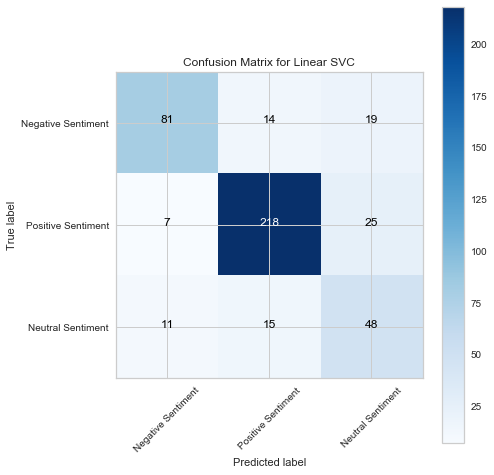

In [28]:


skf = StratifiedKFold(n_splits = 10, random_state=42)


# Perform classification with SVM, kernel=rbf
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [0.01, 0.001, 0.0001] }
clf_rbf = SVC(kernel = 'rbf',decision_function_shape='ovo')
grid_search = GridSearchCV(clf_rbf, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_rbf = grid_search.best_estimator_
print('SVM RBF: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_rbf = clf_rbf.predict(test_vectors)
cnf_matrix_rbf = confusion_matrix(y_test, prediction_rbf)
print('')
print('')
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1



# Perform classification with SVM, kernel=linear - one vs rest
param_grid = {"C": [0.1, 1, 10, 100, 1000] }
clf_liblinear = LinearSVC()
grid_search = GridSearchCV(clf_liblinear, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_liblinear = grid_search.best_estimator_
print('SVM linear One vs Rest: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_liblinear = clf_liblinear.predict(test_vectors)
cnf_matrix_liblinear = confusion_matrix(y_test, prediction_liblinear)
print('')
print('')
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1



# Perform classification with Naive Bayes (Multinomial)
param_grid = {"alpha": [0.5, 1, 1.5, 2] }
clf_MN_NB = MultinomialNB(fit_prior = True)
grid_search = GridSearchCV(clf_MN_NB, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_MN_NB = grid_search.best_estimator_
print('Naive Bayes: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_MN_NB = clf_MN_NB.predict(test_vectors)
cnf_matrix_NB = confusion_matrix(y_test, prediction_MN_NB)
print('')
print('')
t2 = time.time()
time_MN_NB_train = t1-t0
time_MN_NB_predict = t2-t1



# Perform classification with Decision Tree 
param_grid = {"max_depth": [3, 6, 10], "min_samples_split": [2, 5, 10], "criterion": ['gini', 'entropy'], "min_samples_leaf": [1, 5, 10] }
clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(clf_DT, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_DT = grid_search.best_estimator_
print('Decision Tree: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_DT = clf_DT.predict(test_vectors)
cnf_matrix_DT = confusion_matrix(y_test, prediction_DT)
print('')
print('')
print('')
t2 = time.time()
time_DT_train = t1-t0
time_DT_predict = t2-t1



# Print results in a nice table

print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))

print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))
print("Results for Multinomial Naive Bayes")
print("Training time: %fs; Prediction time: %fs" % (time_MN_NB_train, time_MN_NB_predict))
print(classification_report(y_test, prediction_MN_NB))
print("Results for Decision Tree")
print("Training time: %fs; Prediction time: %fs" % (time_DT_train, time_DT_predict))
print(classification_report(y_test, prediction_DT))
print('')
print('')

## plotting confusion matrix for the best performing model

def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_liblinear, classes=['Negative Sentiment', 'Positive Sentiment', 'Neutral Sentiment'], title = 'Confusion Matrix for Linear SVC')

plt.show()    

### 1 gram tf-idf vectoriser generated previously to transform the train and test data into tf-idf matrix 

In [29]:

train_vectors = tfidf_vectorizer_uni.fit_transform(X_train)
test_vectors = tfidf_vectorizer_uni.transform(X_test)

## using SMOTE to oversample minority class 
X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(train_vectors, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 710), (1.0, 710), (2.0, 710)]


### Training and Testing models using Grid Search Approach

SVM RBF: The highest accuracy on the training set after grid search was 0.78
The best parameters are:
{'C': 100, 'gamma': 0.01}


SVM linear One vs Rest: The highest accuracy on the training set after grid search was 0.78
The best parameters are:
{'C': 10}


Naive Bayes: The highest accuracy on the training set after grid search was 0.73
The best parameters are:
{'alpha': 0.5}


Decision Tree: The highest accuracy on the training set after grid search was 0.63
The best parameters are:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}



Results for SVC(kernel=rbf)
Training time: 31.163714s; Prediction time: 0.033088s
             precision    recall  f1-score   support

        0.0       0.79      0.75      0.77       114
        1.0       0.86      0.87      0.87       250
        2.0       0.55      0.57      0.56        74

avg / total       0.79      0.79      0.79       438

Results for LinearSVC()
Training time: 3.851877s; Prediction time: 0.00

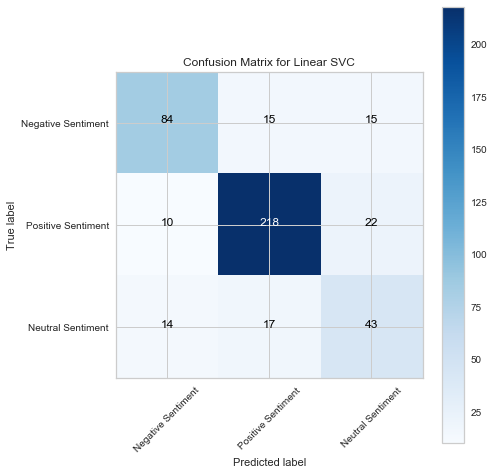

In [30]:



skf = StratifiedKFold(n_splits = 10, random_state=42)


# Perform classification with SVM, kernel=rbf
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [0.01, 0.001, 0.0001] }
clf_rbf = SVC(kernel = 'rbf',decision_function_shape='ovo')
grid_search = GridSearchCV(clf_rbf, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_rbf = grid_search.best_estimator_
print('SVM RBF: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_rbf = clf_rbf.predict(test_vectors)
cnf_matrix_rbf = confusion_matrix(y_test, prediction_rbf)
print('')
print('')
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1



# Perform classification with SVM, kernel=linear - one vs rest
param_grid = {"C": [0.1, 1, 10, 100, 1000] }
clf_liblinear = LinearSVC()
grid_search = GridSearchCV(clf_liblinear, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_liblinear = grid_search.best_estimator_
print('SVM linear One vs Rest: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_liblinear = clf_liblinear.predict(test_vectors)
cnf_matrix_liblinear = confusion_matrix(y_test, prediction_liblinear)
print('')
print('')
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1



# Perform classification with Naive Bayes (Multinomial)
param_grid = {"alpha": [0.5, 1, 1.5, 2] }
clf_MN_NB = MultinomialNB(fit_prior = True)
grid_search = GridSearchCV(clf_MN_NB, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_MN_NB = grid_search.best_estimator_
print('Naive Bayes: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_MN_NB = clf_MN_NB.predict(test_vectors)
cnf_matrix_NB = confusion_matrix(y_test, prediction_MN_NB)
print('')
print('')
t2 = time.time()
time_MN_NB_train = t1-t0
time_MN_NB_predict = t2-t1



# Perform classification with Decision Tree 
param_grid = {"max_depth": [3, 6, 10], "min_samples_split": [2, 5, 10], "criterion": ['gini', 'entropy'], "min_samples_leaf": [1, 5, 10] }
clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(clf_DT, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_DT = grid_search.best_estimator_
print('Decision Tree: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_DT = clf_DT.predict(test_vectors)
cnf_matrix_DT = confusion_matrix(y_test, prediction_DT)
print('')
print('')
print('')
t2 = time.time()
time_DT_train = t1-t0
time_DT_predict = t2-t1



# Print results in a nice table

print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))
print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))
print("Results for Multinomial Naive Bayes")
print("Training time: %fs; Prediction time: %fs" % (time_MN_NB_train, time_MN_NB_predict))
print(classification_report(y_test, prediction_MN_NB))
print("Results for Decision Tree")
print("Training time: %fs; Prediction time: %fs" % (time_DT_train, time_DT_predict))
print(classification_report(y_test, prediction_DT))
print('')
print('')

## plotting confusion matrix for the best performing model

def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_liblinear, classes=['Negative Sentiment', 'Positive Sentiment', 'Neutral Sentiment'], title = 'Confusion Matrix for Linear SVC')

plt.show()    

### 1-2 gram tf-idf vectoriser generated previously to transform the train and test data into tf-idf matrix 

In [31]:
train_vectors = tfidf_vectorizer_bi.fit_transform(X_train)
test_vectors = tfidf_vectorizer_bi.transform(X_test)

## using SMOTE to oversample minority class 
X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(train_vectors, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 710), (1.0, 710), (2.0, 710)]


### Training and testing models using a Grid Search Approach

SVM RBF: The highest accuracy on the training set after grid search was 0.78
The best parameters are:
{'C': 1000, 'gamma': 0.01}


SVM linear One vs Rest: The highest accuracy on the training set after grid search was 0.78
The best parameters are:
{'C': 1}


Naive Bayes: The highest accuracy on the training set after grid search was 0.73
The best parameters are:
{'alpha': 0.5}


Decision Tree: The highest accuracy on the training set after grid search was 0.64
The best parameters are:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}



Results for SVC(kernel=rbf)
Training time: 43.996367s; Prediction time: 0.042632s
             precision    recall  f1-score   support

        0.0       0.81      0.73      0.77       114
        1.0       0.86      0.88      0.87       250
        2.0       0.56      0.61      0.58        74

avg / total       0.80      0.79      0.79       438

Results for LinearSVC()
Training time: 6.397239s; Prediction time: 0.00

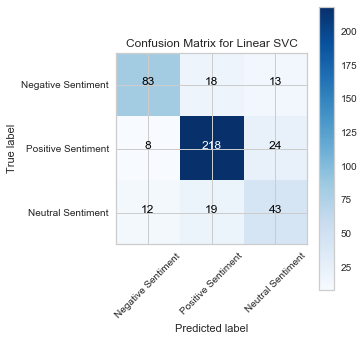

In [32]:


skf = StratifiedKFold(n_splits = 10, random_state=42)


# Perform classification with SVM, kernel=rbf
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [0.01, 0.001, 0.0001] }
clf_rbf = SVC(kernel = 'rbf',decision_function_shape='ovo')
grid_search = GridSearchCV(clf_rbf, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_rbf = grid_search.best_estimator_
print('SVM RBF: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_rbf = clf_rbf.predict(test_vectors)
cnf_matrix_rbf = confusion_matrix(y_test, prediction_rbf)
print('')
print('')
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1



# Perform classification with SVM, kernel=linear - one vs rest
param_grid = {"C": [0.1, 1, 10, 100, 1000] }
clf_liblinear = LinearSVC()
grid_search = GridSearchCV(clf_liblinear, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_liblinear = grid_search.best_estimator_
print('SVM linear One vs Rest: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_liblinear = clf_liblinear.predict(test_vectors)
cnf_matrix_liblinear = confusion_matrix(y_test, prediction_liblinear)
print('')
print('')
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1



# Perform classification with Naive Bayes (Multinomial)
param_grid = {"alpha": [0.5, 1, 1.5, 2] }
clf_MN_NB = MultinomialNB(fit_prior = True)
grid_search = GridSearchCV(clf_MN_NB, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_MN_NB = grid_search.best_estimator_
print('Naive Bayes: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_MN_NB = clf_MN_NB.predict(test_vectors)
cnf_matrix_NB = confusion_matrix(y_test, prediction_MN_NB)
print('')
print('')
t2 = time.time()
time_MN_NB_train = t1-t0
time_MN_NB_predict = t2-t1



# Perform classification with Decision Tree 
param_grid = {"max_depth": [3, 6, 10], "min_samples_split": [2, 5, 10], "criterion": ['gini', 'entropy'], "min_samples_leaf": [1, 5, 10] }
clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(clf_DT, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_DT = grid_search.best_estimator_
print('Decision Tree: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_DT = clf_DT.predict(test_vectors)
cnf_matrix_DT = confusion_matrix(y_test, prediction_DT)
print('')
print('')
print('')
t2 = time.time()
time_DT_train = t1-t0
time_DT_predict = t2-t1



# Print results in a nice table

print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))


print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))
print("Results for Multinomial Naive Bayes")
print("Training time: %fs; Prediction time: %fs" % (time_MN_NB_train, time_MN_NB_predict))
print(classification_report(y_test, prediction_MN_NB))
print("Results for Decision Tree")
print("Training time: %fs; Prediction time: %fs" % (time_DT_train, time_DT_predict))
print(classification_report(y_test, prediction_DT))
print('')
print('')

## plotting confusion matrix for the best performing model

def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    

## plotting confusion matrix for the best performing model

def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_liblinear, classes=['Negative Sentiment', 'Positive Sentiment', 'Neutral Sentiment'], title = 'Confusion Matrix for Linear SVC')

plt.show()    

## 1-2-3 gram tf-idf vectoriser generated previously to transform the train and test data into tf-idf matrix 

In [33]:
train_vectors = tfidf_vectorizer_tri.fit_transform(X_train)
test_vectors = tfidf_vectorizer_tri.transform(X_test)

## using SMOTE to oversample minority class 
X_resampled, y_resampled = SMOTE(random_state=42).fit_sample(train_vectors, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 710), (1.0, 710), (2.0, 710)]


### Training and testing models using a Grid Search Approach

SVM RBF: The highest accuracy on the training set after grid search was 0.79
The best parameters are:
{'C': 1000, 'gamma': 0.01}


SVM linear One vs Rest: The highest accuracy on the training set after grid search was 0.79
The best parameters are:
{'C': 10}


Naive Bayes: The highest accuracy on the training set after grid search was 0.72
The best parameters are:
{'alpha': 0.5}


Decision Tree: The highest accuracy on the training set after grid search was 0.66
The best parameters are:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}



Results for SVC(kernel=rbf)
Training time: 53.829686s; Prediction time: 0.050689s
             precision    recall  f1-score   support

        0.0       0.81      0.72      0.76       114
        1.0       0.86      0.87      0.87       250
        2.0       0.54      0.61      0.57        74

avg / total       0.79      0.79      0.79       438

Results for LinearSVC()
Training time: 8.944069s; Prediction time: 0.0

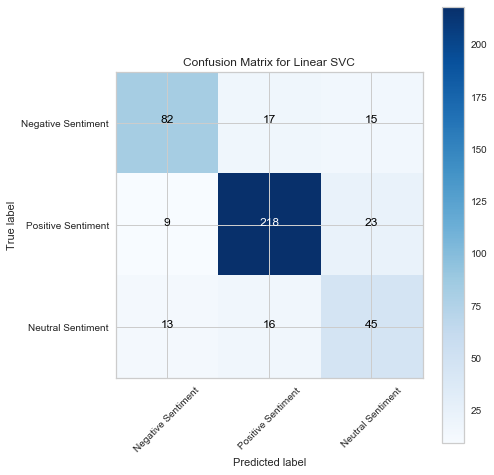

In [34]:

skf = StratifiedKFold(n_splits = 10, random_state=42)


# Perform classification with SVM, kernel=rbf
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [0.01, 0.001, 0.0001] }
clf_rbf = SVC(kernel = 'rbf',decision_function_shape='ovo')
grid_search = GridSearchCV(clf_rbf, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_rbf = grid_search.best_estimator_
print('SVM RBF: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_rbf = clf_rbf.predict(test_vectors)
cnf_matrix_rbf = confusion_matrix(y_test, prediction_rbf)
print('')
print('')
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1



# Perform classification with SVM, kernel=linear - one vs rest
param_grid = {"C": [0.1, 1, 10, 100, 1000] }
clf_liblinear = LinearSVC()
grid_search = GridSearchCV(clf_liblinear, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_liblinear = grid_search.best_estimator_
print('SVM linear One vs Rest: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_liblinear = clf_liblinear.predict(test_vectors)
cnf_matrix_liblinear = confusion_matrix(y_test, prediction_liblinear)
print('')
print('')
t2 = time.time()
time_liblinear_train = t1-t0
time_liblinear_predict = t2-t1



# Perform classification with Naive Bayes (Multinomial)
param_grid = {"alpha": [0.5, 1, 1.5, 2] }
clf_MN_NB = MultinomialNB(fit_prior = True)
grid_search = GridSearchCV(clf_MN_NB, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_MN_NB = grid_search.best_estimator_
print('Naive Bayes: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_MN_NB = clf_MN_NB.predict(test_vectors)
cnf_matrix_NB = confusion_matrix(y_test, prediction_MN_NB)
print('')
print('')
t2 = time.time()
time_MN_NB_train = t1-t0
time_MN_NB_predict = t2-t1



# Perform classification with Decision Tree 
param_grid = {"max_depth": [3, 6, 10], "min_samples_split": [2, 5, 10], "criterion": ['gini', 'entropy'], "min_samples_leaf": [1, 5, 10] }
clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(clf_DT, param_grid, cv = skf)
t0 = time.time()
grid_search.fit(train_vectors, y_train)
t1 = time.time()
clf_DT = grid_search.best_estimator_
print('Decision Tree: The highest accuracy on the training set after grid search was %.2f' %(grid_search.best_score_))
print('The best parameters are:')
print(grid_search.best_params_)
prediction_DT = clf_DT.predict(test_vectors)
cnf_matrix_DT = confusion_matrix(y_test, prediction_DT)
print('')
print('')
print('')
t2 = time.time()
time_DT_train = t1-t0
time_DT_predict = t2-t1



# Print results in a nice table

print("Results for SVC(kernel=rbf)")
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
print(classification_report(y_test, prediction_rbf))

print("Results for LinearSVC()")
print("Training time: %fs; Prediction time: %fs" % (time_liblinear_train, time_liblinear_predict))
print(classification_report(y_test, prediction_liblinear))
print("Results for Multinomial Naive Bayes")
print("Training time: %fs; Prediction time: %fs" % (time_MN_NB_train, time_MN_NB_predict))
print(classification_report(y_test, prediction_MN_NB))
print("Results for Decision Tree")
print("Training time: %fs; Prediction time: %fs" % (time_DT_train, time_DT_predict))
print(classification_report(y_test, prediction_DT))
print('')
print('')

## plotting confusion matrix for the best performing model

def plot_confusion_matrix(cm, classes,title, cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_liblinear, classes=['Negative Sentiment', 'Positive Sentiment', 'Neutral Sentiment'], title = 'Confusion Matrix for Linear SVC')

plt.show()    

In [35]:
print(sorted(Counter(y_train).items()))

[(0.0, 311), (1.0, 710), (2.0, 291)]
